# Comparative Subject Wi2Vi

In [1]:
# Imports
# !pip install torchinfo
import torch
import torch.nn as nn
import torch.utils.data as Data
from torchvision import datasets, transforms
from torchinfo import summary
import matplotlib.pyplot as plt
import os
# os.environ['OPENBLAS_NUM_THREADS'] = '1'
import numpy as np
import gc
import random
import time
import CompMethods_V3 as TP
import DataSetting_v5 as DS

In [2]:
gpu = 0
date = '20240917'
name = f'{date}_COMP_sub'
data_path = ['../dataset/Door_EXP/A308']
level = 'subject'

data_organizer = DS.DataOrganizer(name, data_path, level)
data_organizer.load()

Cross validation plan at subject level
Loading ../dataset/Door_EXP/A308...

Loaded 0716D00-csi.npy of shape (1172731, 30, 3)
Loaded 0716D00-pd.npy of shape (1172731, 62)
Loaded 0716D01-csi.npy of shape (999414, 30, 3)
Loaded 0716D01-pd.npy of shape (999414, 62)
Loaded 0716D02-csi.npy of shape (1249977, 30, 3)
Loaded 0716D02-pd.npy of shape (1249977, 62)
Loaded 0716D03-csi.npy of shape (1022668, 30, 3)
Loaded 0716D03-pd.npy of shape (1022668, 62)
Loaded 0717D04-csi.npy of shape (976630, 30, 3)
Loaded 0717D04-pd.npy of shape (976630, 62)
Loaded 0717D05-csi.npy of shape (1055272, 30, 3)
Loaded 0717D05-pd.npy of shape (1055272, 62)
Loaded 0717D10-csi.npy of shape (10727, 30, 3, 3)
Loaded 0717D11-csi.npy of shape (10562, 30, 3, 3)
Loaded 0717D12-csi.npy of shape (8569, 30, 3, 3)
Loaded 0717D13-csi.npy of shape (10707, 30, 3, 3)
Loaded 20240716_145635-bbx.npy of shape (6080, 4)
Loaded 20240716_145635-cimg.npy of shape (6080, 1, 128, 128)
Loaded 20240716_145635-ctr.npy of shape (6080, 2)
Load

### Wi2Vi

In [3]:
preprocess_wi2vi = DS.Preprocess(new_size=(240, 320))
data_organizer.load_plan('../dataset/Door_EXP/subject_r0.2_A308.pkl')

def run():
    for i in range(6):
        data_organizer.gen_plan()
        train_loader, valid_loader, test_loader, current_test = data_organizer.gen_loaders(mode='s', num_workers=1)
    
        wi2vi = TP.Wi2Vi()
        Wi2Vi_trainer = TP.CompTrainer(name='Wi2Vi', mask=False,
                                      networks=[wi2vi],
                                       lr=1e-4, epochs=10, cuda=gpu,
                                       preprocess = preprocess_wi2vi,
                                       loss_optimizer = {'LOSS': [torch.optim.Adam, 1e-4]},
                                       train_loader=train_loader, valid_loader=valid_loader, test_loader=test_loader, 
                                       notion=f'{name}_{current_test}_Wi2Vi')
        wi2vi_trained = Wi2Vi_trainer.schedule()

        del Wi2Vi_trainer
        del wi2vi_trained
        torch.cuda.empty_cache()
        gc.collect()

Generating loaders for s: level = subject, current test = qiao
 Train dataset length = 423
 Test dataset length = 77
 Exported train loader of len 5, batch size = 64
 Exported valid loader of len 1, batch size = 64
 Exported test loader of len 2, batch size = 1

==========20240917_COMP_sub_qiao_Wi2Vi Wi2Vi Training starting==========


D:\Cao\Models\Trainer.py:112: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = GradScaler()


  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          |[00:00<?]

Training stopped due to [Errno 22] Invalid argument


IndexError: list index out of range

<Figure size 640x480 with 0 Axes>

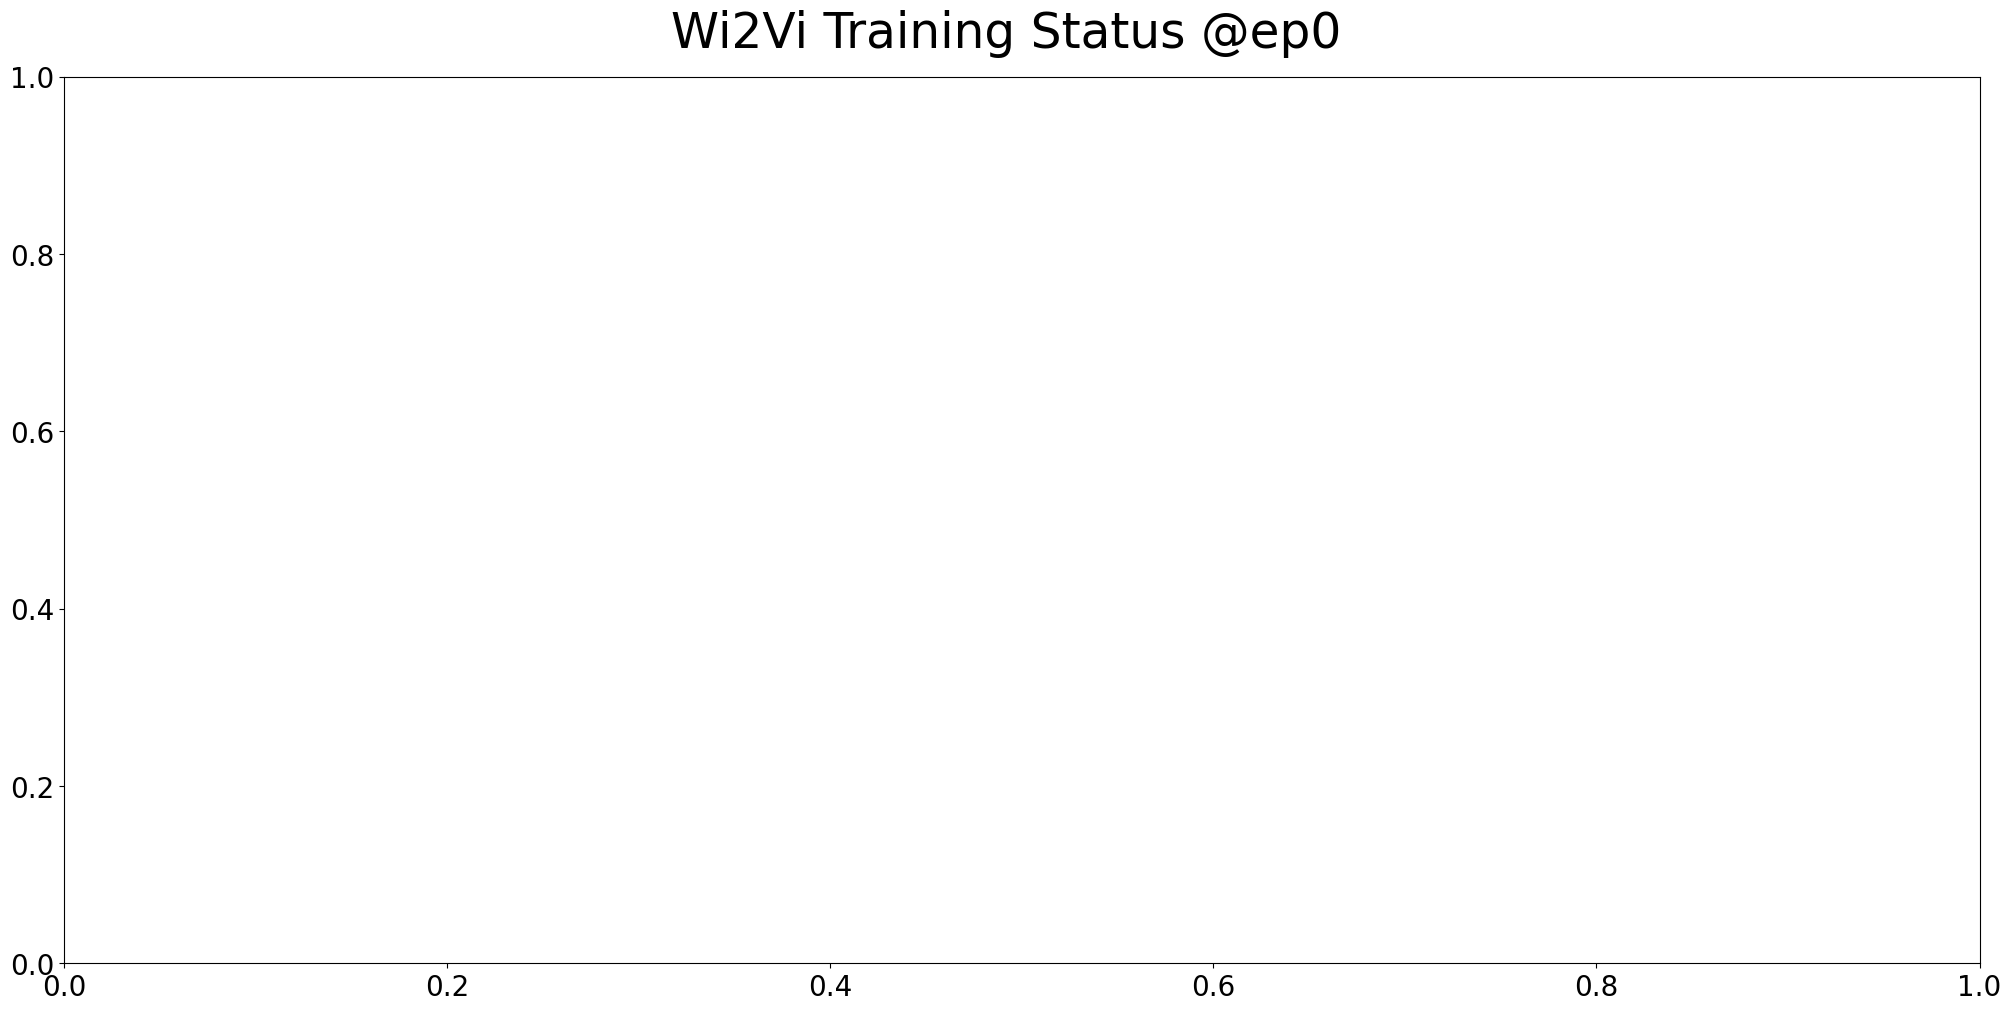

In [4]:
import multiprocessing
multiprocessing.set_start_method('spawn', force=True)
gpu = 0
torch.cuda.set_device(gpu)
run()